In [1]:
%matplotlib inline
from effective_quadratures.PolyParams import PolynomialParam
from effective_quadratures.PolyParentFile import PolyParent
from effective_quadratures.IndexSets import IndexSet
import effective_quadratures.ComputeStats as stats
import numpy as np
import matplotlib.pyplot as plt

Assume we have a computational model -- in this case Rosenbrock's function -- that has two uncertainties. Thus
$$f(x_1, x_2) = (1 - x_1)^2 + 100(x_1 - x_2^2)^2$$
where
$x_1$ and $x_2$ are Gaussians with $\mu=1$ and $\sigma=2$. Our objective is to compute the mean and variance in the output $f$: $\mu(f)$ and $\sigma(f)$. Ok cool -- let's begin!

We start by defining our computational model, and call it fun(x)

In [2]:
def rosenbrock_fun(x):
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2

Next, we set the number of evaluation points in each direction. Lets opt for 4 points in the first direction $(x_1)$ and 7 points in the second direction $(x_2)$. Using a tensor grid, this results in 28 points.

In [11]:
no_pts_x1 = 5
no_pts_x2 = 5
mu = 1
sigma = 2
variance = sigma**2
method = "tensor grid"
x1 = PolynomialParam("Gaussian", [], [], mu, variance, [], no_pts_x1)
x2 = PolynomialParam("Gaussian", [], [], mu, variance, [], no_pts_x2)


Now we plot the corresponding tensor grid

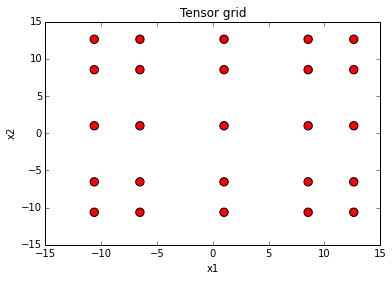

In [12]:
x1x2 = []
x1x2.append(x1)
x1x2.append(x2)
uqProblem = PolyParent(x1x2, method)
pts, wts = PolyParent.getPointsAndWeights(uqProblem)

plt.scatter(pts[:,0], pts[:,1], s=70, c='r', marker='o');
plt.xlabel('x1');
plt.ylabel('x2');
plt.title('Tensor grid');

Now, we evaluate Rosenbrocks function at these points and compute the pseudospectral coefficients:

In [5]:
x, i, f = PolyParent.getCoefficients(uqProblem, rosenbrock_fun)
mean, variance = stats.compute_mean_variance(x, i)

We wrap up with some print statements:

In [6]:
print 'MEAN & VARIANCE:'
print str(mean)+'\t'+str(variance)

MEAN & VARIANCE:
544064.0	394079028224.0


Now we compare this result with brute-force Monte Carlo.

In [10]:
large_number = 5000000
s = sigma * np.random.randn(large_number,2) + mu
f = np.zeros((large_number,1))
for i in range(0, large_number):
    f[i,0] = rosenbrock_fun([s[i,0], s[i,1]])
    

In [11]:
print 'MONTE CARLO MEAN & VARIANCE:'
print str(np.mean(f))+'\t'+str(np.var(f))

MONTE CARLO MEAN & VARIANCE:
6814.21698892	476625857.339


They seem pretty close! yay! Now we can do the same using a sparse grid using the sparse pseudospectral approximation method. The steps above remain the same with the exception of the choice of method:

In [34]:
method = "spam"
growth_rule = "linear"
level = 3
dimension = 2
basis = IndexSet("sparse grid", [], level, growth_rule, dimension)
uqProblem = PolyParent(x1x2, method, basis)

Now lets plot the points associated with this sparse grid

In [35]:
pts, wts = PolyParent.getPointsAndWeights(uqProblem)

TypeError: 'NoneType' object is not iterable